Predicción de cáncer de mama: benigno o maligno

Para predecir si el diagnóstico del cáncer es benigno o maligno basado en varias observaciones/características, se utilizan 30 características, por ejemplo:

•radio (promedio de distancias desde el centro hasta puntos en el perímetro)

•textura (desviación estándar de los valores en escala de grises)

•perímetro

•área

•suavidad (variación local en longitudes de radio)

•compacidad (perímetro^2 / área - 1.0)

•concavidad (gravedad de las porciones cóncavas del contorno)

•puntos cóncavos (número de porciones cóncavas del contorno)

•simetría

•dimensión fractal ("aproximación de la línea costera" - 1)

Los conjuntos de datos son linealmente separables utilizando las 30 características de entrada. Número de instancias: 569. Distribución de clases: 212 malignas, 357 benignas. Clase objetivo:

•Maligna

•Benigna

In [98]:
#importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import os
print(os.listdir("breast-cancer-csv"))

['breast-cancer.csv']


In [99]:
df_cancer = pd.read_csv('breast-cancer-csv/breast-cancer.csv')

In [78]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Mapeo de la variable de diagnóstico, que es nuestra variable objetivo, a 0 y 1: 1 para Maligno, 0 para Benigno.

In [100]:
df_cancer.loc[:,'diagnosis'] = df_cancer.diagnosis.map({'M':1, 'B':0})

In [80]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Miramos los últimos 5 registros para conocer la distribución de los datos

In [71]:
df_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [72]:
df_cancer.shape

(569, 33)

Valores faltantes

In [73]:
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Como podemos observas la columna 'Unnamed: 32' no contiene algun valor de interés, por lo cual procedemos a eliminarla

In [101]:
df_cancer.drop(columns = ['Unnamed: 32'], inplace = True)

Visualizamos las características importantes en relación con la variable objetivo 'diagnóstico' para determinar con qué características está más relacionada.

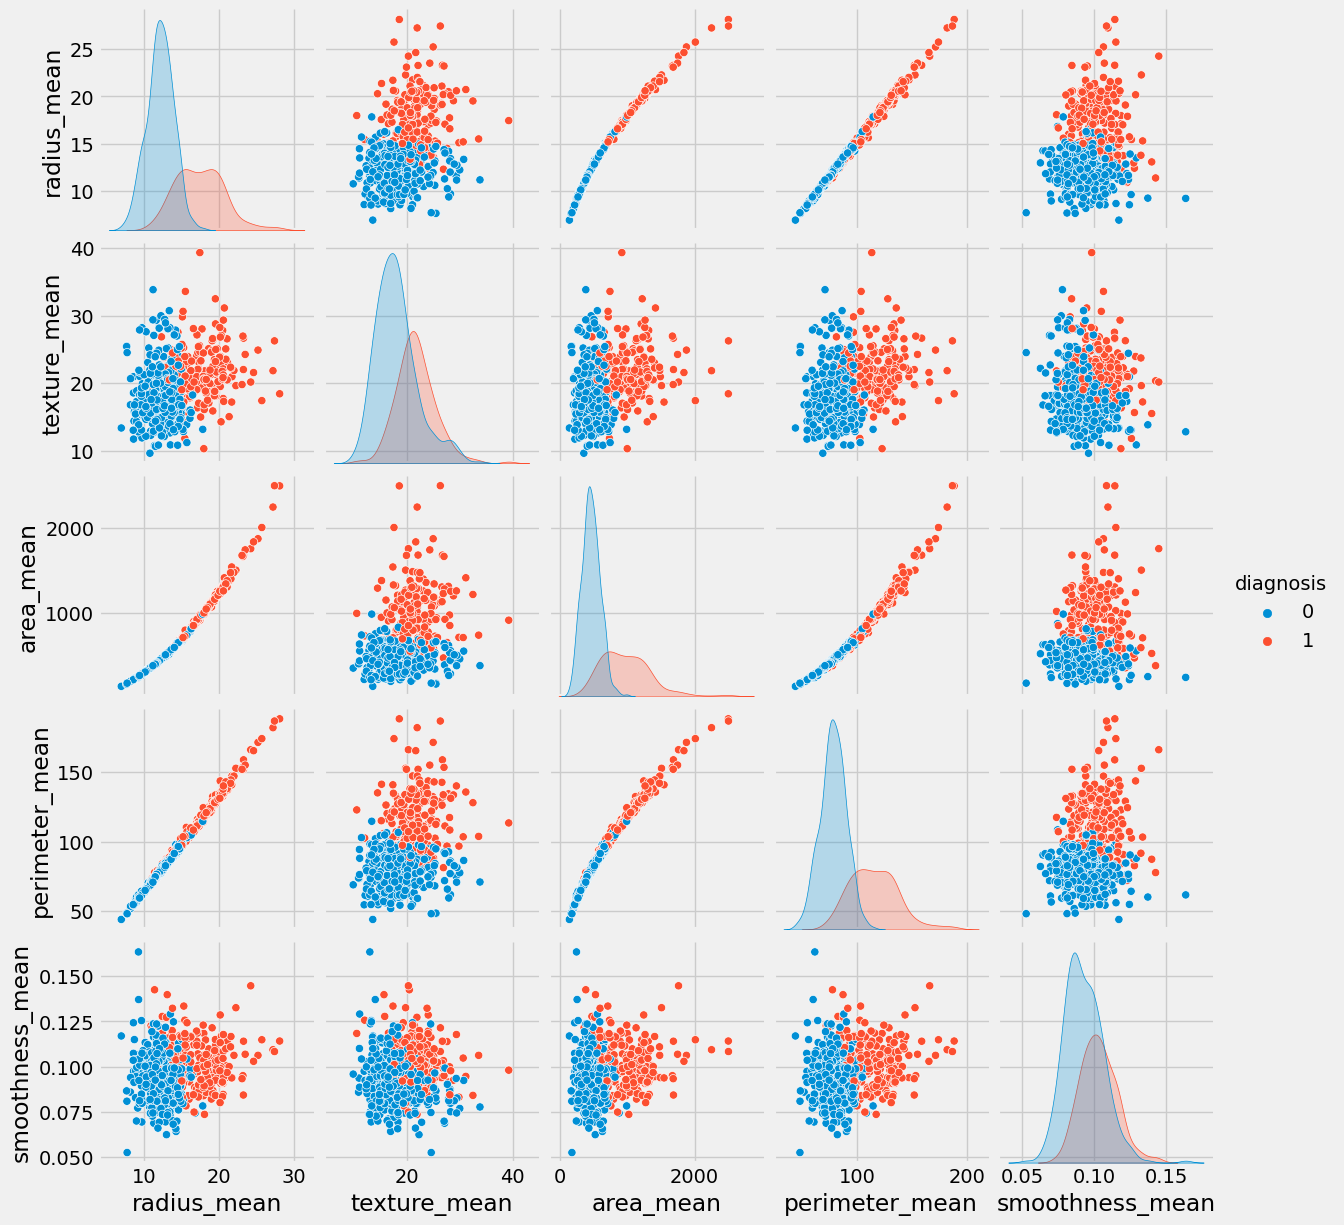

In [96]:
sns.pairplot(df_cancer, hue = 'diagnosis', 
             vars = ['radius_mean', 'texture_mean', 'area_mean',
                      'perimeter_mean', 'smoothness_mean'])

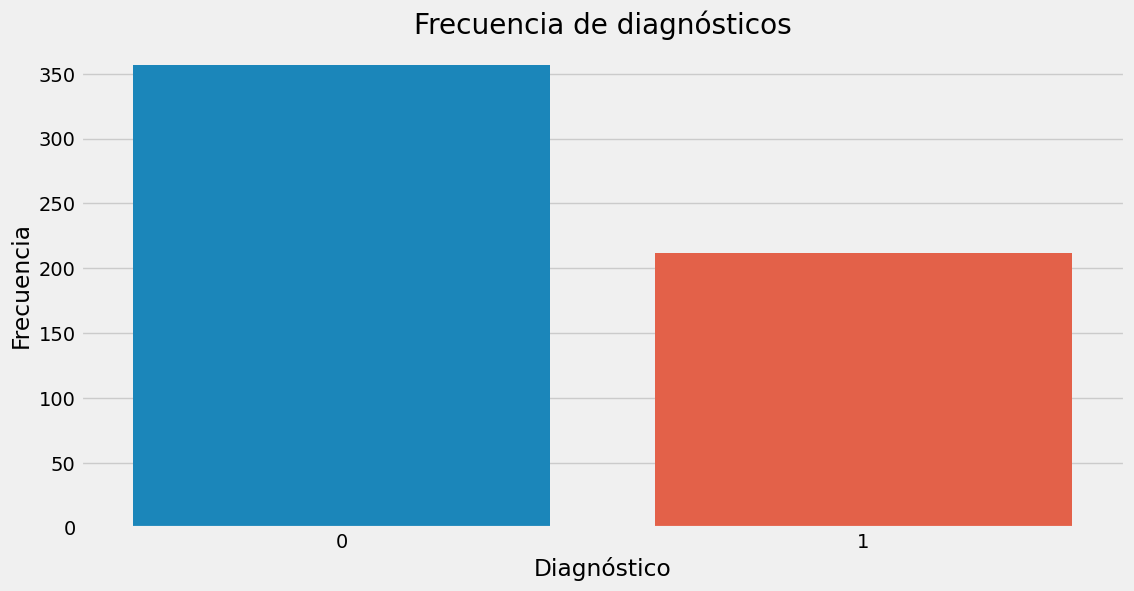

In [83]:
# Reemplaza 'df_cancer' con el nombre real de tu DataFrame
sns.countplot(data=df_cancer, x='diagnosis')
plt.title('Frecuencia de diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show() 

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

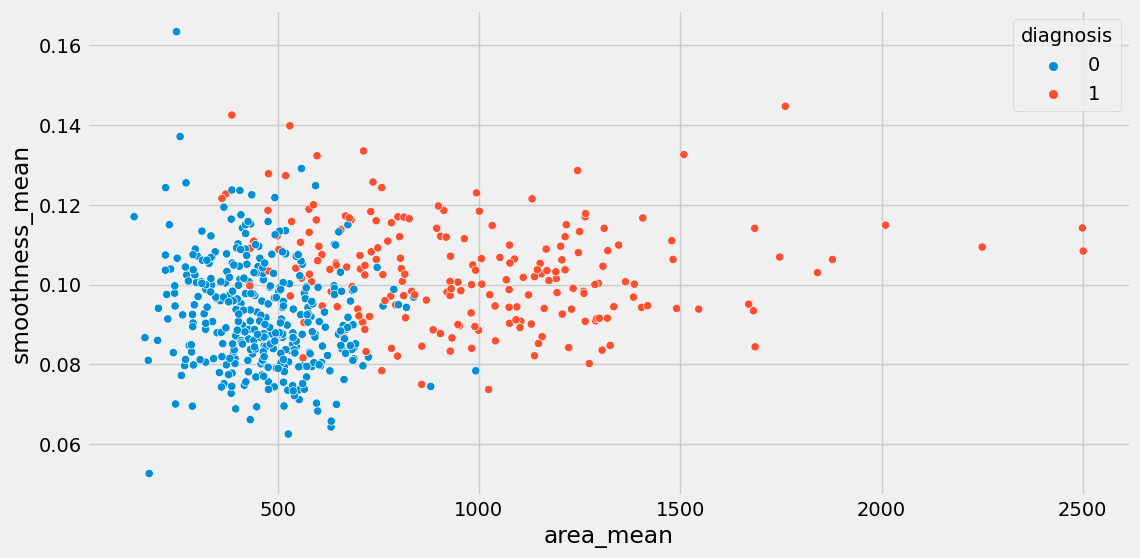

In [84]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = df_cancer)

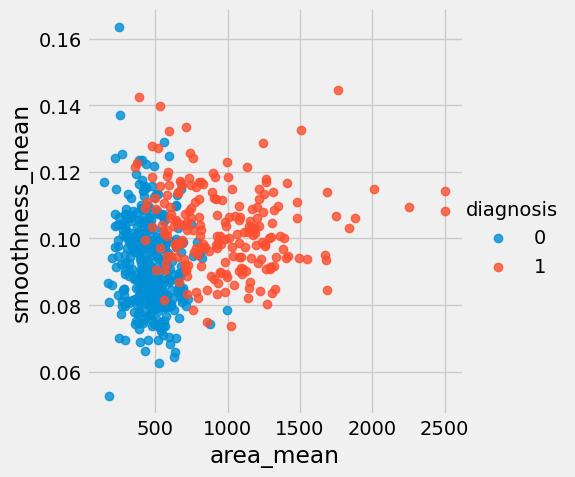

In [85]:
sns.lmplot(x = 'area_mean',y = 'smoothness_mean', hue ='diagnosis', data = df_cancer, fit_reg=False)

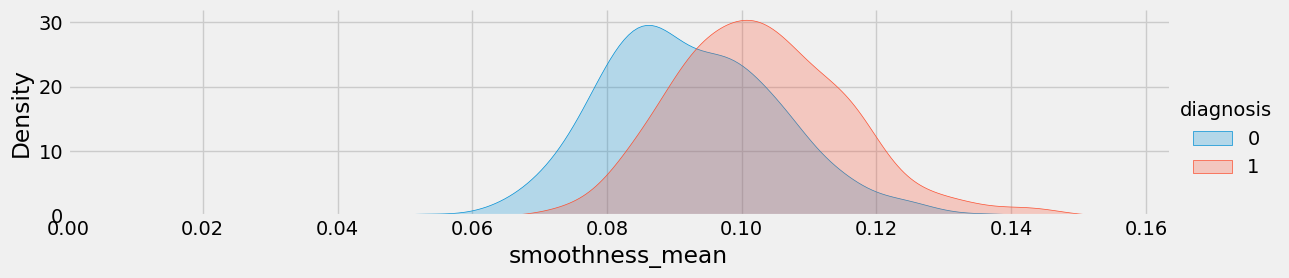

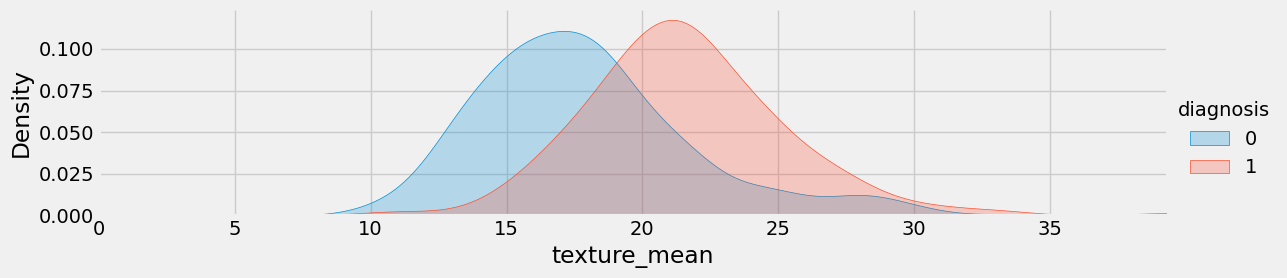

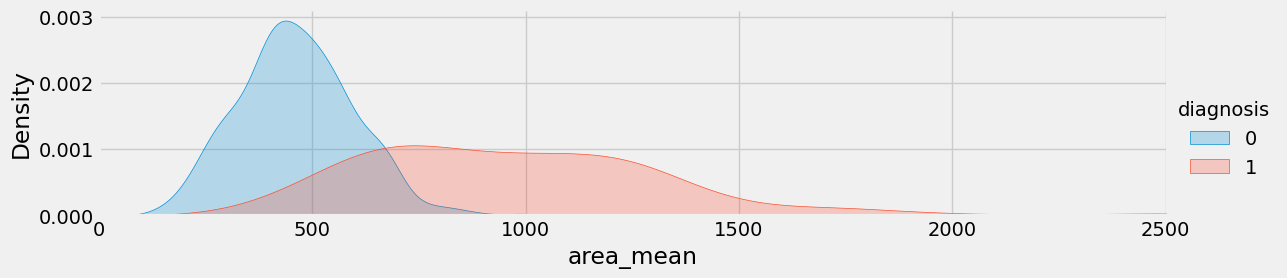

In [86]:
variables = ['smoothness_mean', 'texture_mean', 'area_mean']

for variable in variables:
    fig = sns.FacetGrid(df_cancer, hue="diagnosis", aspect=4)
    fig.map(sns.kdeplot, variable, shade=True)
    oldest = df_cancer[variable].max()
    fig.set(xlim=(0, oldest))
    fig.add_legend()

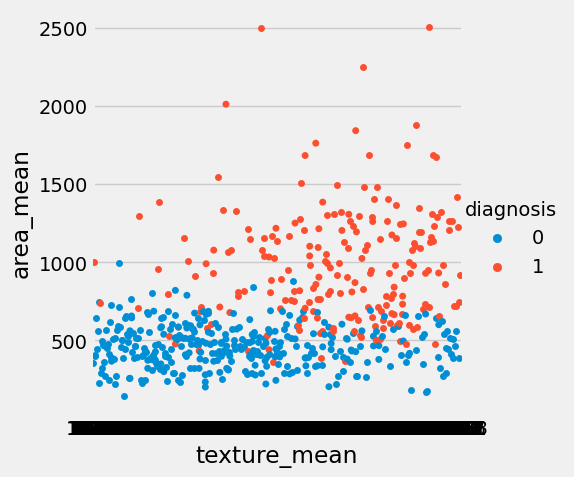

In [87]:
sns.catplot(x= 'texture_mean', y= 'area_mean', hue='diagnosis', data=df_cancer)


<Axes: xlabel='concavity_se', ylabel='radius_mean'>

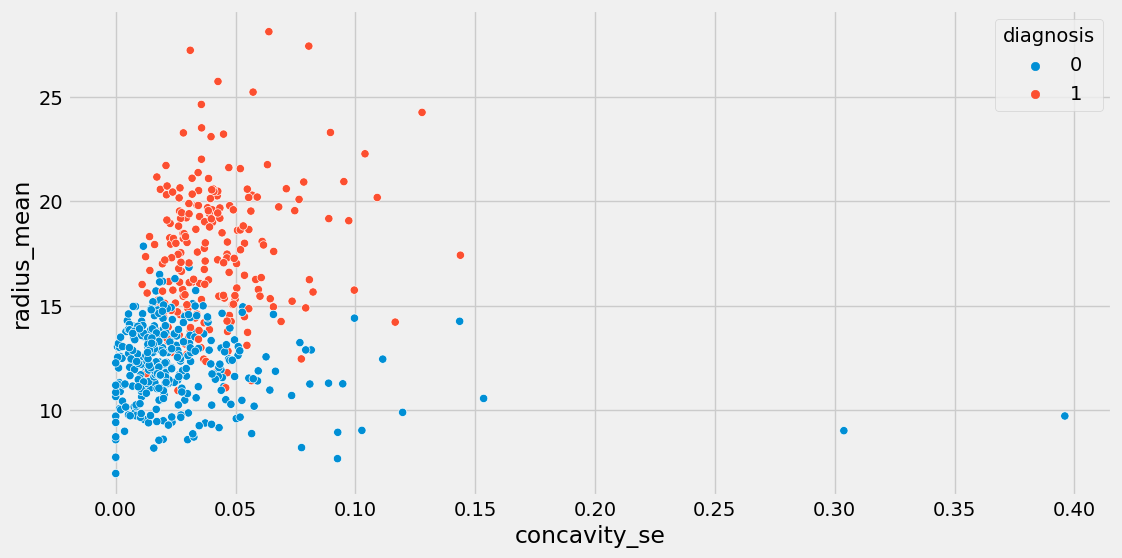

In [37]:
sns.scatterplot(x = 'concavity_se', y = 'radius_mean', hue ='diagnosis', data = df_cancer)

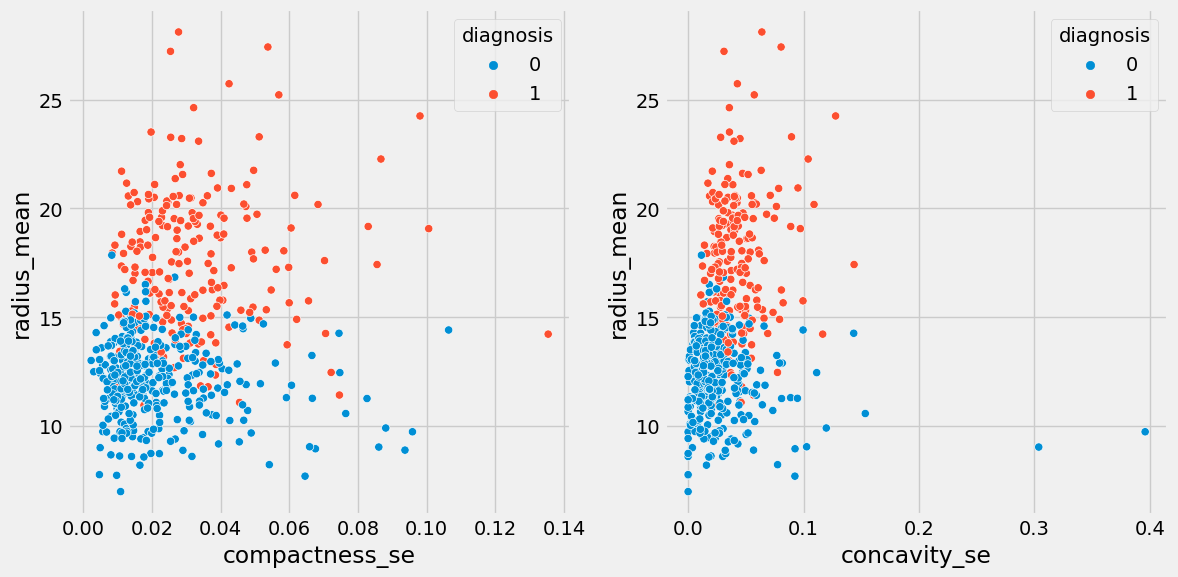

In [38]:
variables = ['compactness_se', 'concavity_se']
hue_var = 'diagnosis'

plt.figure(figsize=(12, 6))
for idx, var in enumerate(variables, 1):
    plt.subplot(1, 2, idx)
    sns.scatterplot(x=var, y='radius_mean', hue=hue_var, data=df_cancer)

plt.tight_layout()
plt.show()

Verificando la correlación entre diferentes características y la variable objetivo 'diagnosis'

Aparte de la visualización. Pero si deseas ver números y estadísticas, existen otras formas de descubrir cómo se correlacionan los datos.

El Coeficiente de Correlación de Pearson te ayuda a determinar la relación entre dos cantidades. Te brinda la medida de la fuerza de la asociación entre dos variables. El valor del Coeficiente de Correlación de Pearson puede estar entre -1 y +1.

1 significa que están altamente correlacionadas y 0 significa ausencia de correlación. -1 significa que hay una correlación negativa. Piénsalo como una proporción inversa.

La prueba t es una correlación que evalúa cualquier correlación entre dos valores.

Otros coeficientes de correlación populares incluyen

La correlación de rango de Spearman Pearson’s Rank Correlation.

La importancia de la correlación de datos tiene un efecto cuando tienes un conjunto de datos con muchas características. Es tentador pensar que un mayor número de características ayudará a un modelo a realizar mejores predicciones. Pero eso es incorrecto.

Si intentas entrenar un modelo en un conjunto de características sin o con muy poca correlación, obtendrás resultados inexactos.

<Axes: >

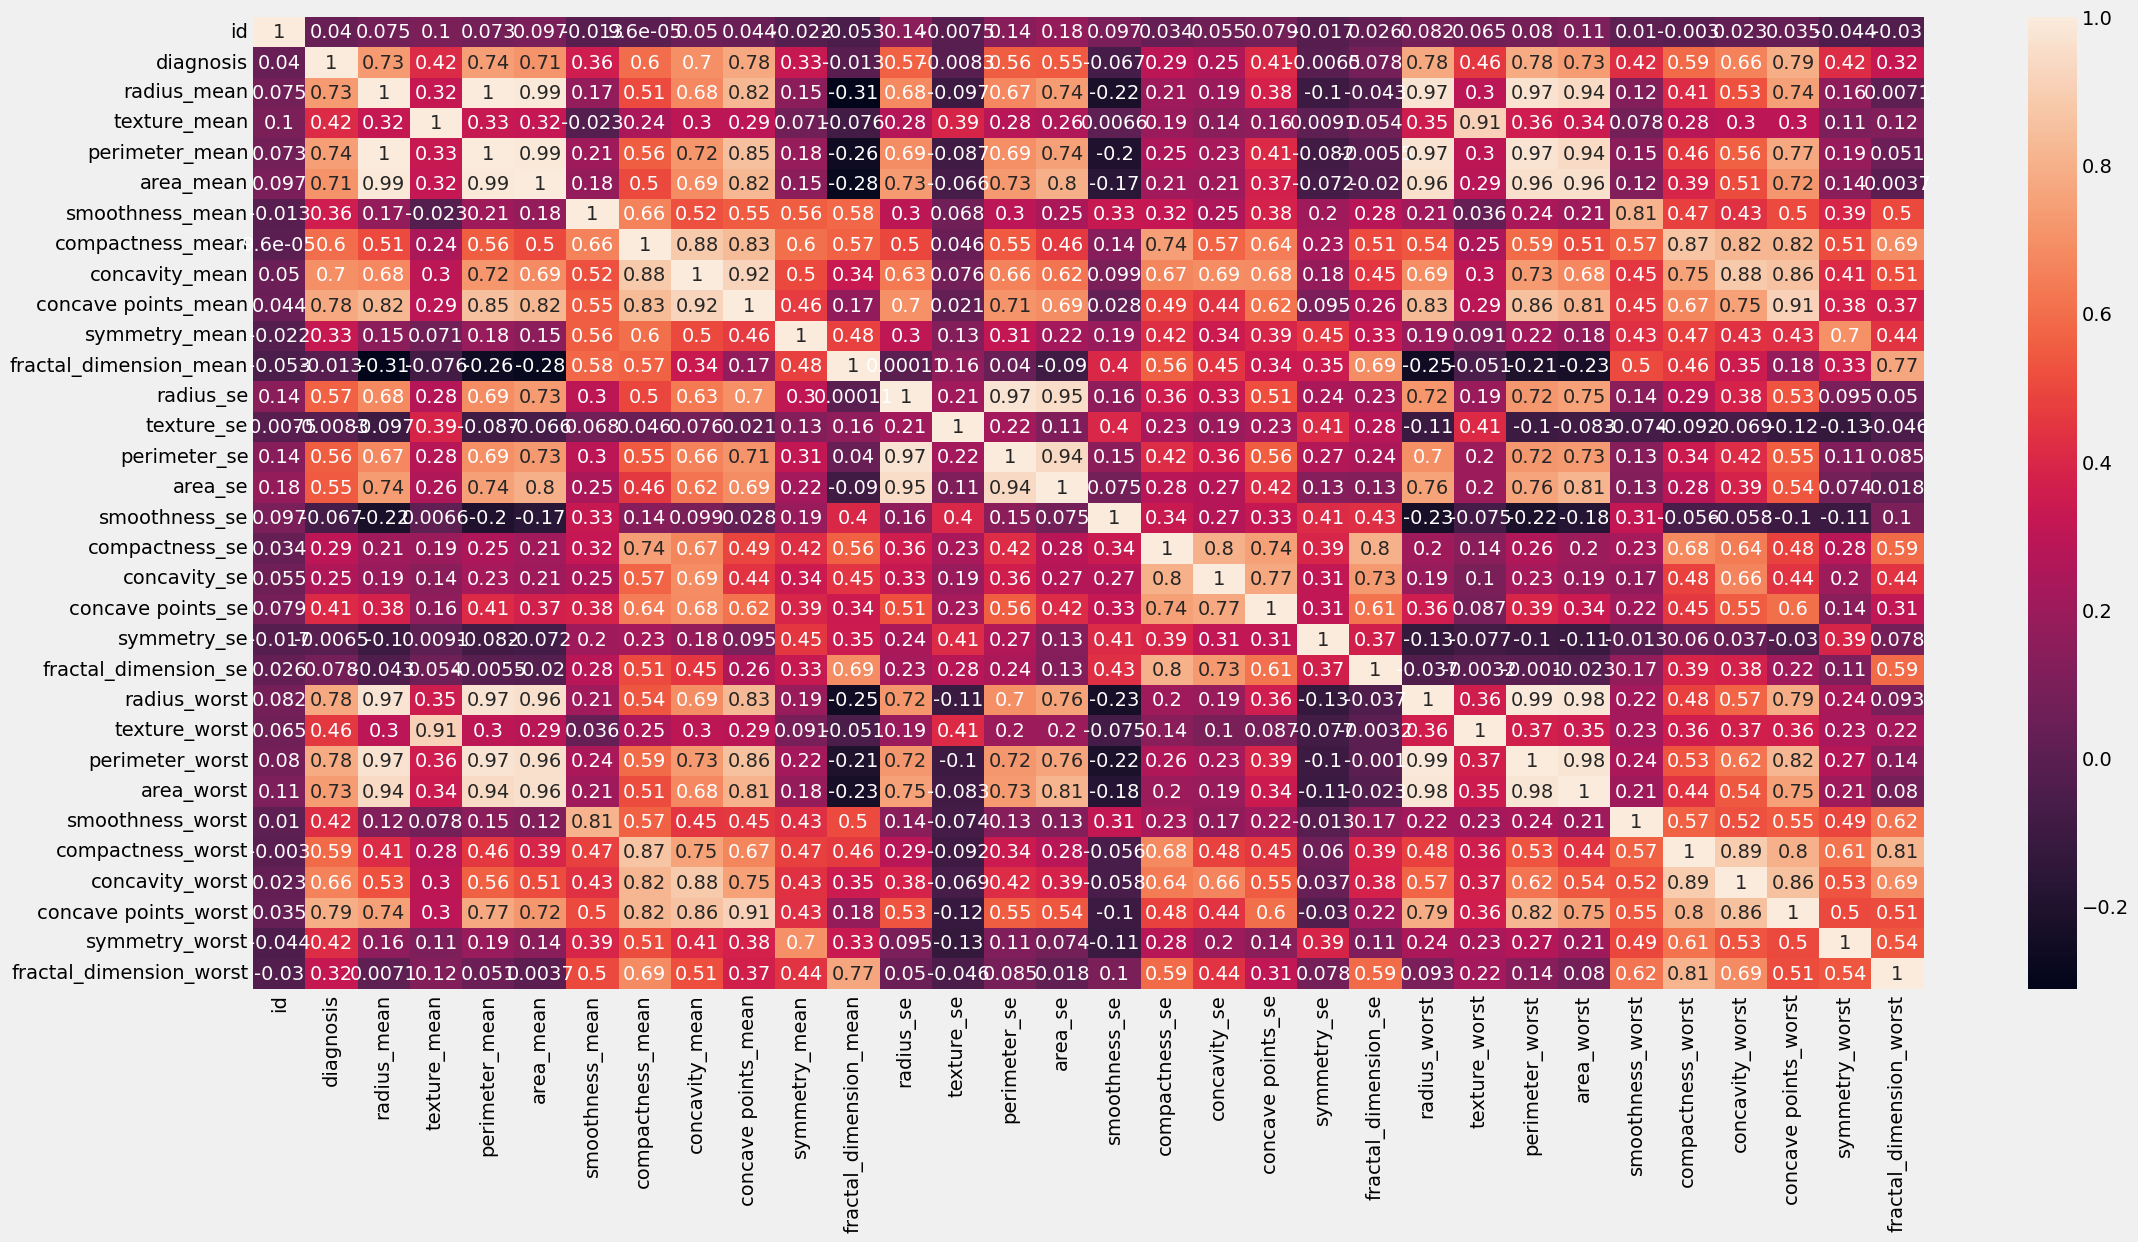

In [39]:
plt.figure(figsize=(24,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

Lo siguiente es eliminar las variables que no aporten al modelo

In [102]:
unwantedcolumnlist = ["diagnosis", "id"]

In [103]:
X = df_cancer.drop(unwantedcolumnlist,axis=1)

In [104]:
y = df_cancer['diagnosis']

In [105]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Luego dividiremos el conjunto de datos en entrenamiento y prueba utilizando la función train_test_split de la librería sklearn, asignando los conjuntos resultantes a X_train, X_test, y_train y y_test.

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

Un SVM (Máquina de Vectores de Soporte) es un algoritmo de aprendizaje automático supervisado que puede emplearse para clasificación y regresión. Los SVM se utilizan más comúnmente en problemas de clasificación, y es en eso en lo que nos enfocaremos en esta publicación.

Los SVM se basan en la idea de encontrar un hiperplano que divida mejor un conjunto de datos en dos clases, como se muestra en la imagen a continuación.

Los vectores de soporte son los puntos de datos más cercanos al hiperplano, los puntos de un conjunto de datos que, si se quitaran, alterarían la posición del hiperplano divisor. Por esta razón, pueden considerarse los elementos críticos de un conjunto de datos.

¿Qué es un hiperplano?

Como ejemplo simple, para una tarea de clasificación con solo dos características (como la imagen anterior), se puede pensar en un hiperplano como una línea que separa y clasifica linealmente un conjunto de datos.

De manera intuitiva, mientras más alejados estén nuestros puntos de datos del hiperplano, más seguros estamos de que han sido clasificados correctamente. Por lo tanto, queremos que nuestros puntos de datos estén lo más lejos posible del hiperplano, pero aún en el lado correcto de este.

Entonces, cuando se agrega nueva información de prueba, el lado del hiperplano en el que caiga determinará la clase que le asignamos.

¿Cómo encontramos el hiperplano correcto?

O, en otras palabras, ¿cómo segregamos mejor las dos clases dentro de los datos?

La distancia entre el hiperplano y el punto de datos más cercano de cualquiera de los conjuntos se conoce como margen. El objetivo es elegir un hiperplano con el margen más grande posible entre el hiperplano y cualquier punto dentro del conjunto de entrenamiento, lo que aumenta la probabilidad de clasificar correctamente nuevos datos.

In [107]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [108]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[66,  0],
       [ 7, 41]], dtype=int64)

<Axes: >

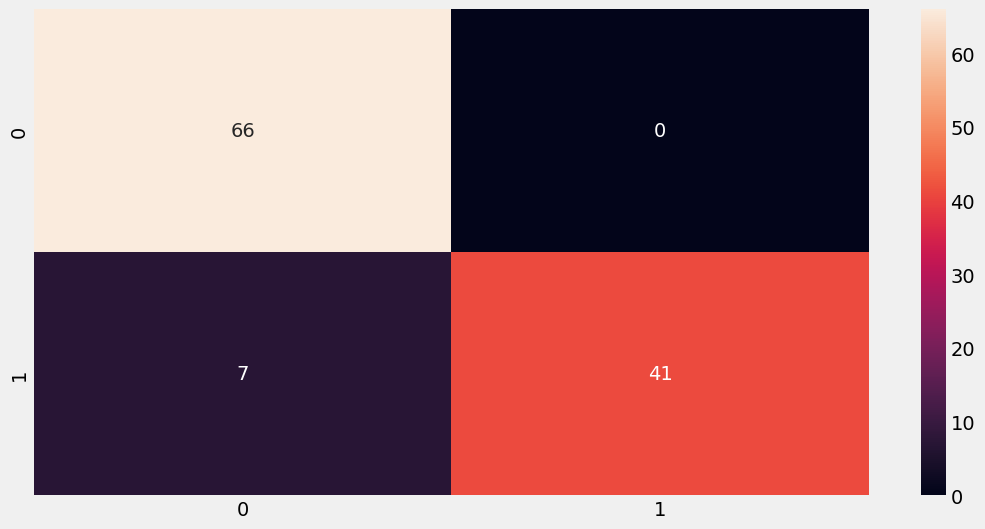

In [109]:
sns.heatmap(cm, annot=True)

In [110]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        66
           1       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [111]:
min_train = X_train.min()
min_train

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.362100
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000950
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

In [112]:
range_train = (X_train - min_train).max()
range_train

radius_mean                  21.129000
texture_mean                 29.570000
perimeter_mean              144.710000
area_mean                  2355.500000
smoothness_mean               0.110770
compactness_mean              0.326020
concavity_mean                0.426800
concave points_mean           0.201200
symmetry_mean                 0.198000
fractal_dimension_mean        0.045790
radius_se                     2.761500
texture_se                    4.522900
perimeter_se                 21.223000
area_se                     518.798000
smoothness_se                 0.029417
compactness_se                0.133148
concavity_se                  0.396000
concave points_se             0.052790
symmetry_se                   0.071068
fractal_dimension_se          0.028890
radius_worst                 25.190000
texture_worst                37.520000
perimeter_worst             170.390000
area_worst                 3246.800000
smoothness_worst              0.129430
compactness_worst        

In [113]:
X_train_scaled = (X_train - min_train)/range_train

In [114]:
X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,0.294335,0.206628,0.278350,0.167183,0.293220,0.101620,0.003423,0.016208,0.288889,0.196113,...,0.257245,0.224680,0.244087,0.139122,0.321641,0.104113,0.010136,0.085911,0.258019,0.188968
410,0.207251,0.265810,0.198328,0.108809,0.324546,0.103521,0.065206,0.104374,0.273232,0.200262,...,0.203255,0.647655,0.203416,0.103517,0.572742,0.130890,0.163891,0.298900,0.334521,0.146989
197,0.525297,0.410213,0.508673,0.373806,0.190304,0.205632,0.258435,0.287177,0.358586,0.075126,...,0.469631,0.337953,0.461823,0.321178,0.131731,0.163974,0.229412,0.315498,0.191019,0.069133
376,0.169861,0.355428,0.182157,0.082700,0.343956,0.449727,0.534208,0.295278,0.569697,0.754313,...,0.115919,0.287846,0.153178,0.051343,0.333230,0.324640,0.545701,0.503436,0.245189,0.426079
244,0.587770,0.466351,0.589524,0.429421,0.452018,0.418441,0.480084,0.441650,0.463636,0.219262,...,0.544661,0.493337,0.554551,0.379389,0.580468,0.261480,0.312941,0.537457,0.321929,0.138397


<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

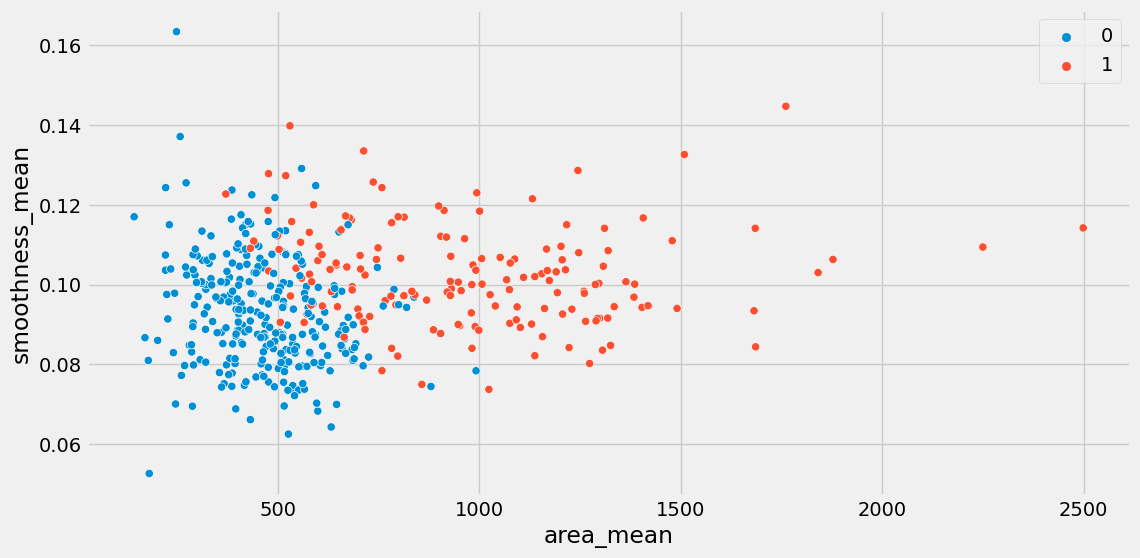

In [115]:
sns.scatterplot(x = X_train['area_mean'], y = X_train['smoothness_mean'], hue = y_train)

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

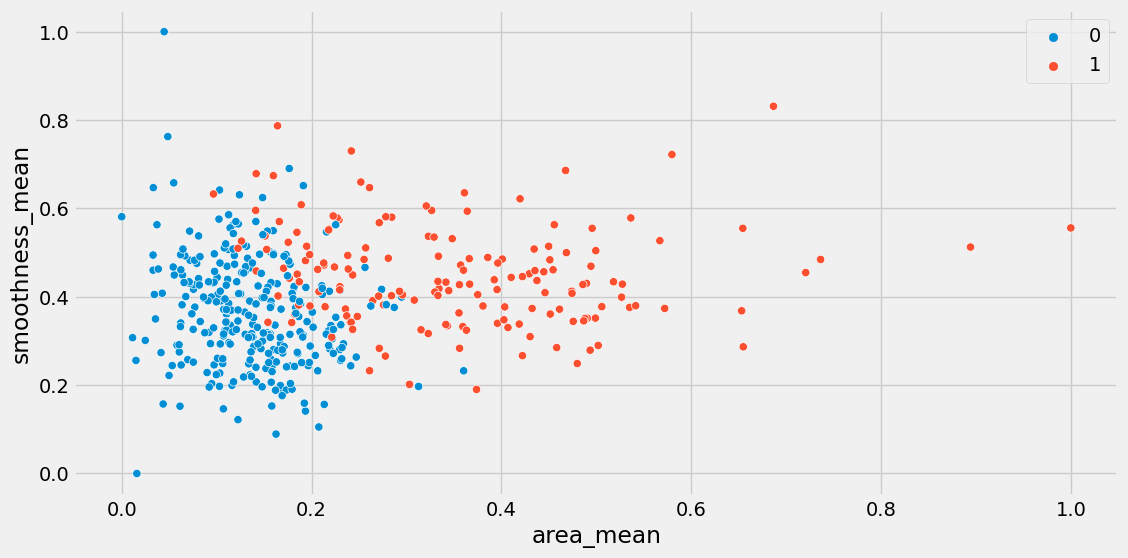

In [116]:
sns.scatterplot(x = X_train_scaled['area_mean'], y = X_train_scaled['smoothness_mean'], hue = y_train)

In [117]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [118]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

<Axes: >

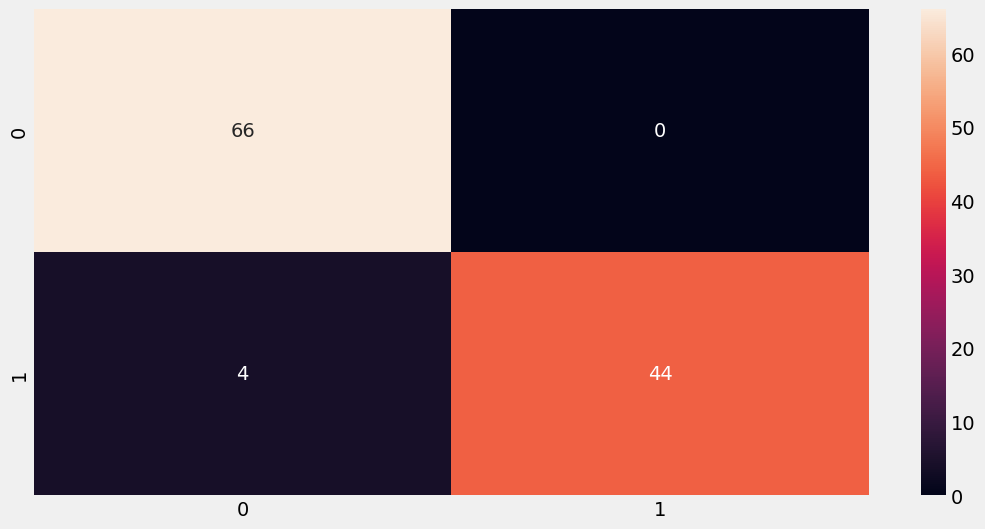

In [119]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [120]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Mejorar el modelo utilizando GridSearchCV

¿Qué es GridSearch?
Grid Search es un algoritmo que nos permite ajustar los hiperparámetros de un modelo. Pasamos los hiperparámetros a ajustar, los posibles valores para cada hiperparámetro y una métrica de rendimiento como entrada al algoritmo de búsqueda en cuadrícula. El algoritmo colocará todas las combinaciones posibles de hiperparámetros en una cuadrícula y luego encontrará el rendimiento del modelo para cada combinación con respecto a un conjunto de validación cruzada. Luego, devuelve la combinación de hiperparámetros que proporciona el mejor resultado.

GridSearch se utiliza generalmente cuando no estamos seguros de los buenos valores para un parámetro. Podríamos tener un rango de valores de parámetros que creemos que funcionarían para el modelo y queremos probar cuál de ellos usar. En esa situación, resulta tedioso entrenar el modelo una y otra vez con diferentes parámetros, y es ahí cuando usamos GridSearch.

Supongamos que para resolver el problema de optimización para un conjunto fijo de valores de hiperparámetros α y β, obtenemos un valor de w. Dado que el valor óptimo de w (llamémoslo w∗) es una función de α y β, podemos escribirlo de la siguiente manera:

w∗(α,β)=argminwP(w,α,β,Strain)

Ahora usamos este w∗ para predecir en la muestra de validación y obtener el error de validación. Podemos ver este escenario en términos de una "función de error de validación": la función toma como entradas los hiperparámetros α y β, y devuelve el error de validación correspondiente a w∗(α,β).

Por lo tanto, el objetivo de la optimización de hiperparámetros es encontrar el conjunto de valores de α y β que minimizan esta función de error de validación.

Entonces, en la técnica de Grid Search, selecciona un conjunto de valores de α (α1, α2, ...) y un conjunto de valores de β (β1, β2, ...) y, para cada par de valores, evalúa la función de error de validación. Luego selecciona el par que ofrece el valor mínimo de la función de error de validación.

Los pares (α1,β1),(α1,β2),…,(α2,β1),(α2,β2),… cuando se representan gráficamente en el espacio, tienen un aspecto de cuadrícula, de ahí el nombre.

In [121]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [124]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [125]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [126]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [127]:
grid_predictions = grid.predict(X_test_scaled)

<Axes: >

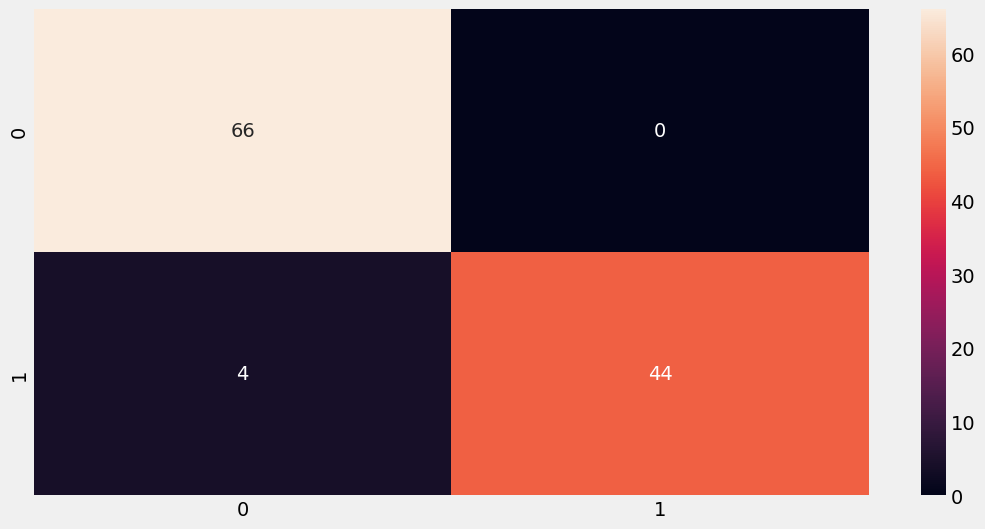

In [128]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm,annot=True,fmt="d")

In [129]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Hemos logrado un 96% de precisión y exactitud para detectar cáncer de mama maligno o benigno.